In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.3 MB/s 
     |████████████████████████████████| 957 kB 84.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.5 MB/s 
     |████████████████████████████████| 9.8 MB 44.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd, pmdarima as pm, joblib
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import cumsum

# **Stationarity**

* Trend stationary: Trend is zero

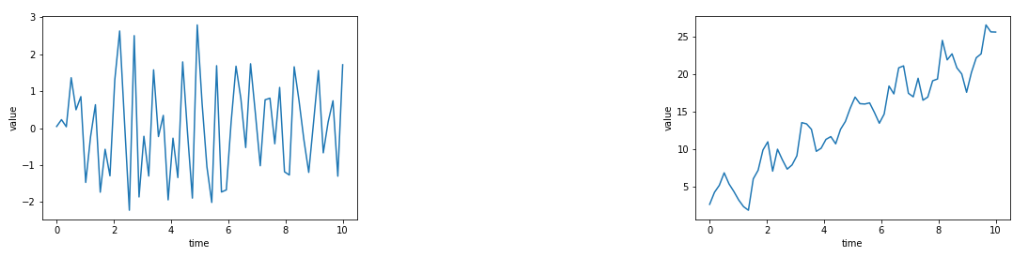

* Constant variance

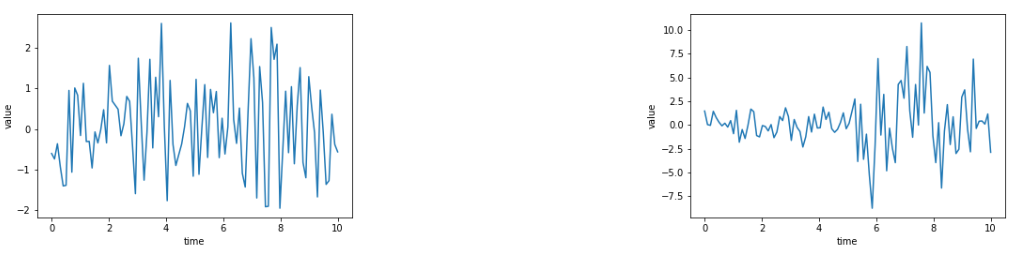

* Constant autocorrelation

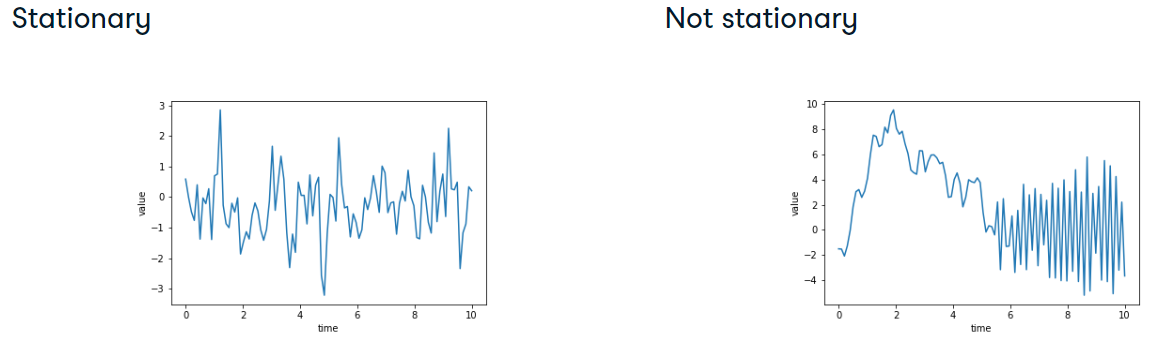

## ***Exploration***

You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

* Load in the candy production time series `'candy_production.csv'` using `pandas`, set the index to the `'date'` column, parse the dates and assign it to the variable `candy`.

* Plot the time series onto the axis `ax1` using the DataFrame's **`.plot()`** method. Then show the plot.

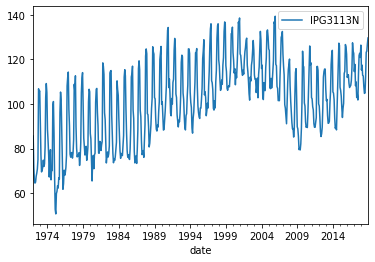

In [2]:
# Load in the time series
candy = pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

Can you tell whether this is a stationary time series or not?

## ***Train-test splits***

In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The `candy` production data set has been loaded in for you as `candy` already and `pyplot` has been loaded in as `plt`.


* Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.

* Make a `pyplot` axes using the **`subplots()`** function.

* Use the DataFrame's **`.plot()`** method to plot the train and test sets on the axis `ax`.

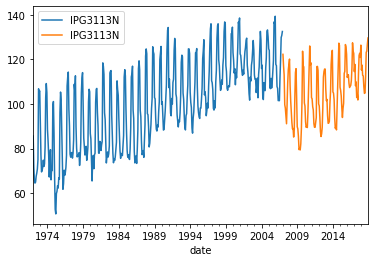

In [3]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()    

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

 Take a look at the plot, do you think that you yourself could predict what happens after 2006 given the blue training set. What happens to the long term trend and the seasonal pattern?

 ## ***Is it stationary***

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, ***you can often transform non-stationary time series to stationary ones***.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

The top plot shown is a time series of Amazon stock close price.
Is the stock close price stationary?

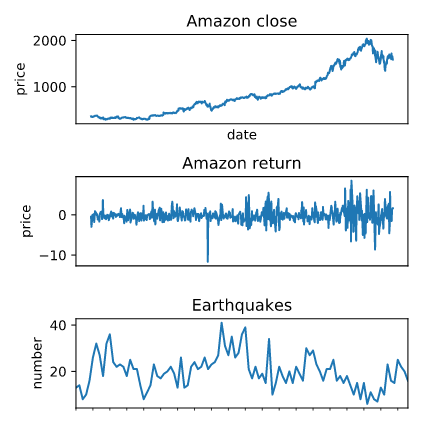

    * No, because the top plot has a trend.

* Is the stock return stationary?
    * No, because in the middle plot, the variance changes with time.

* Is the number of major earthquakes per year stationary?
    * You can't see any trend, or any obvious changes in variance, or dynamics. Earthquake looks stationary.

# **AD-Fuller Tests**

```
(-1.34, 0.60, 23, 1235, {'1%': -3.435, '5%': -2.863, '10%': -2.568}, 10782.87)
```

* -1.34 คือ test-stat
* 0.60 คือ p-value

ดูเพิ่มได้ที่ www.statsmodels.org/dev/generated/statsmodels.tsa.sta

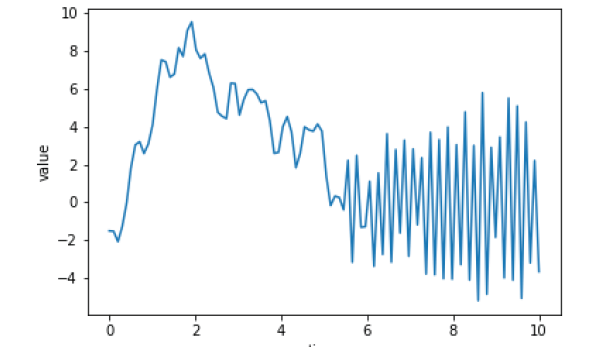

* **ยังคงต้องพล็อตกราฟช่วยดูอยู่ เพราะ AD-Fuller แยกแยก autocorrelation ไม่ได้**

# **เปลี่ยนรูปอนุกรมเวลาให้เป็น stationary**

* **`pd.DataFrame.diff()`**
* **`np.log()`**
* **`np.sqrt()`**
* **`pd.DataFrame.shift(1) / pd.DataFrame`** (Proportional change)

## ***Augmented Dicky-Fuller***

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as `earthquake`.

* Run the **`adfuller()`** function on the `'earthquakes_per_year'` column of the `earthquake` DataFrame and assign the result to `result`.

* Print the test statistic, the p-value and the critical values.

In [13]:
from statsmodels.tsa.stattools import adfuller
earthquake = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=['date'])

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


You can reject the null hypothesis that the time series is non-stationary. Therefore it is stationary.

## ***Taking the difference***

* Run the augmented Dicky-Fuller on the `'city_population'` column of `city`.
Print the test statistic and the p-value.

* Take the first difference of `city` dropping the `NaN` values. Assign this to `city_stationary` and run the test again.


* Take the second difference of `city`, by applying the **`.diff()`** method twice and drop the `NaN` values.

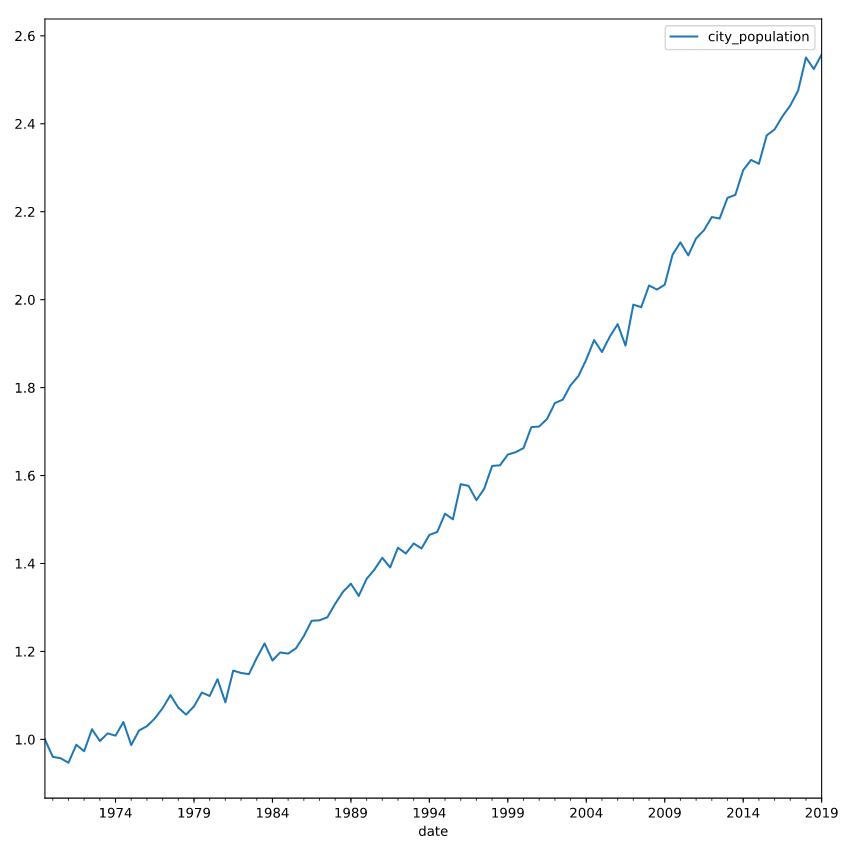

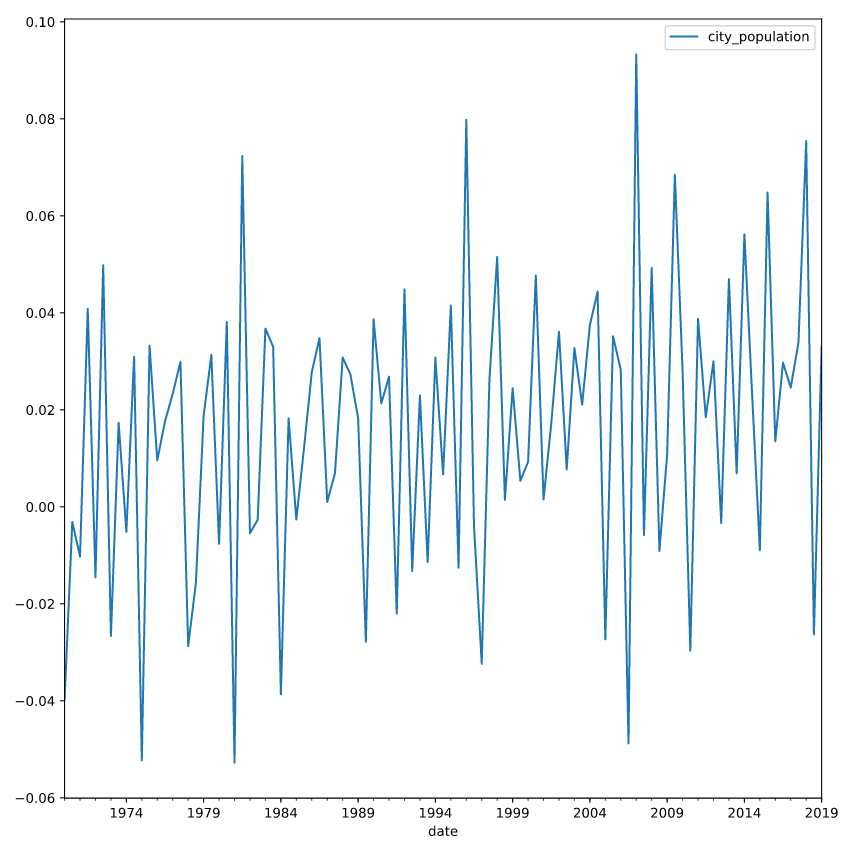

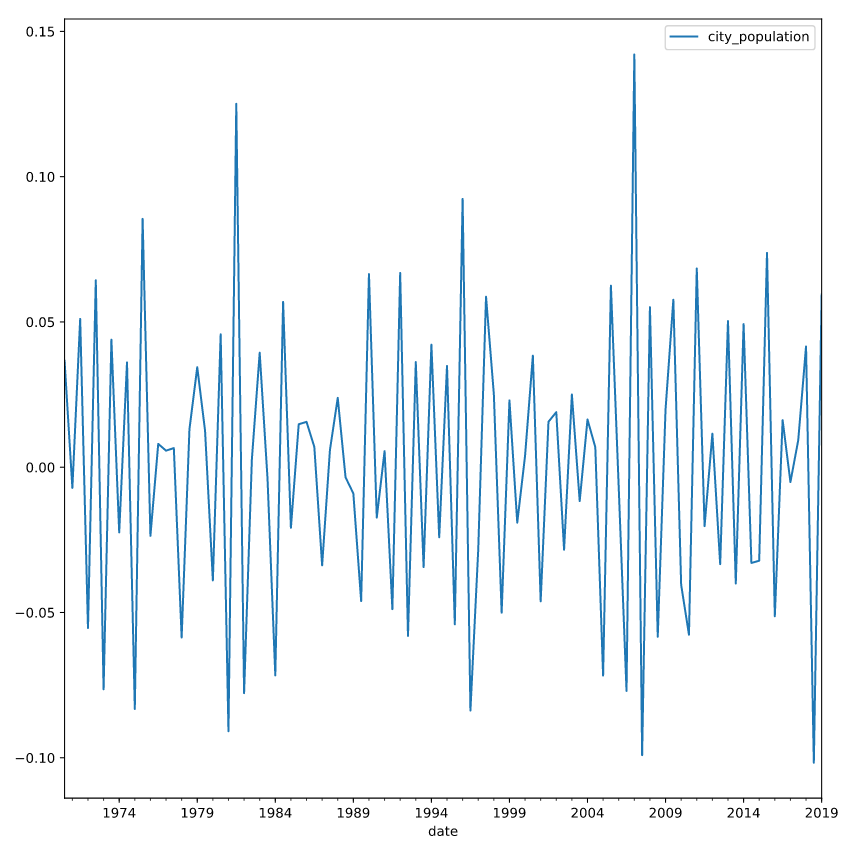

A p-value of 0.000000016 is very significant! This time series is now stationary and ready for modeling!

## ***Other tranforms***

Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

$$log\_return ( y_t ) = log \left( \frac{y_t}{y_{t-1}} \right)$$

The Amazon stock time series has already been loaded for you as `amazon`.

* Calculate the first difference of the time series `amazon` to test for stationarity and drop the `NaN`s.



In [17]:
amazon = pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)

# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon / amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.2035794888112825, 2.331271725486696e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


Notice that both the differenced and the log-return transformed time series have a small p-value, but the log transformed time series has a much more negative test statistic. This means the log-return tranformation is better.

## ***Generating ARMA data***

* Remember for any model ARMA(p,q):

* The list `ar_coefs` has the form `[1, -a_1, -a_2, ..., -a_p]`.
* The list `ma_coefs` has the form `[1, m_1, m_2, ..., m_q]`,

1. Set `ar_coefs` and `ma_coefs` for an MA(1) model with MA lag-1 coefficient of `-0.7`. Generate a time series of 100 values.

2. Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

3. Set the coefficients for a model with form $y_t = -0.2 y_{t-1} + 0.3 \epsilon_{t-1} + 0.4 \epsilon_{t-2} + \epsilon_t$.

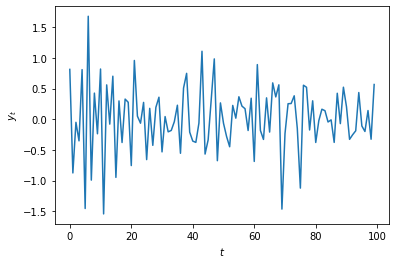

In [7]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1, 0]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

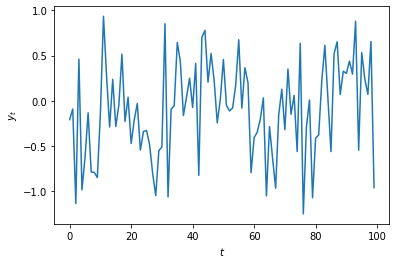

In [8]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

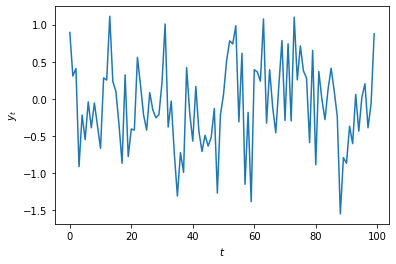

In [9]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

## ***Fitting Prelude***

In [ ]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1, 1))  # y is time series we want to fit

# Fit the model
results = model.fit()

# ***ARMAX***

* AR(1, 1) $$y_t = a_1y_{t-1} + m_1\epsilon_{t-1} + \epsilon_t$$
* ARMAX(1, 1) $$y_t = \beta X_t + a_1y_{t-1} + m_1\epsilon_{t-1} + \epsilon_t$$

## ***Fitting an ARMA model***



In [13]:
earthquake = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=['date'])

# Instantiate the model
model = ARMA(earthquake['earthquakes_per_year'], order=(3, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will b

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Fri, 02 Sep 2022   AIC                            643.345
Time:                          21:15:47   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

## ***Fitting an ARMAX model***

In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional `wait_times_hrs`. This may be related to an exogenous variable that you measured `nurse_count` which is the number of nurses on shift at any given time. These can be seen below.

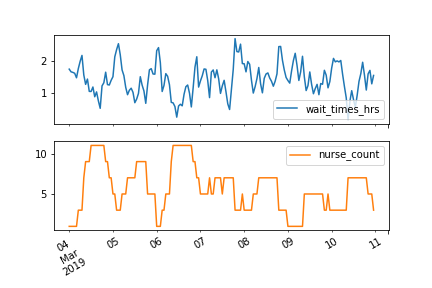

This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

The time series data is available in your environment as `hospital` and has the two columns mentioned above. The `ARMA` class is also available for you.

* Instantiate an ARMAX(2,1) model to train on the `'wait_times_hrs'` column of hospital using the `'nurse_count'` column as an exogenous variable.


In [ ]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2, 1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())



```
                              ARMA Model Results                              
    ==============================================================================
    Dep. Variable:         wait_times_hrs   No. Observations:                  168
    Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
    Method:                       css-mle   S.D. of innovations              0.259
    Date:                Fri, 02 Sep 2022   AIC                             35.668
    Time:                        21:19:41   BIC                             54.411
    Sample:                    03-04-2019   HQIC                            43.275
                             - 03-10-2019                                         
    ========================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
    ----------------------------------------------------------------------------------------
    const                    2.1000      0.086     24.293      0.000       1.931       2.269
    nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
    ar.L1.wait_times_hrs     0.5693      0.164      3.468      0.001       0.248       0.891
    ar.L2.wait_times_hrs    -0.1612      0.131     -1.226      0.220      -0.419       0.096
    ma.L1.wait_times_hrs     0.3728      0.157      2.375      0.018       0.065       0.680
                                        Roots                                    
    =============================================================================
                      Real          Imaginary           Modulus         Frequency
    -----------------------------------------------------------------------------
    AR.1            1.7656           -1.7566j            2.4906           -0.1246
    AR.2            1.7656           +1.7566j            2.4906            0.1246
    MA.1           -2.6827           +0.0000j            2.6827            0.5000
    -----------------------------------------------------------------------------
```
Look back at the model parameters. What is the relation between the number of nurses on shift and the wait times? If you predicted that tomorrow was going to have long wait times how could you combat this?

# **Statsmodels SARIMAX class**


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Just an ARMA(p,q) model
model = SARIMAX(df, order=(p,0,q))

# An ARMA(p,q) + constant model
model = SARIMAX(df, order=(p,0,q), trend='c') 

### **An ARMA(p,q) + constant**

* If the time series is not centered around zero, ***this is a must***

# **Making one-step-ahead predictions**

In [ ]:
# Make predictions for last 25 values
results = model.fit()

# Make in-sample prediction
forecast = results.get_prediction(start=-25)

# forecast mean
mean_forecast = forecast.predicted_mean

Predicted mean is a pandas series
```
2013-10-28 1.519368 
2013-10-29 1.351082 
2013-10-30 1.218016
```

# **Confidence intervals**

In [ ]:
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

Confidence interval method returns pandas DataFrame


```
              lower y upper y 
2013-09-28 -4.720471 -0.815384 
2013-09-29 -5.069875  0.112505 
2013-09-30 -5.232837  0.766300 
2013-10-01 -5.305814  1.282935 
2013-10-02 -5.326956  1.703974
```

# **Plotting predictions**


In [ ]:
plt.figure()
# Plot prediction

plt.plot(dates, mean_forecast.values, color='red', label='forecast')

# Shade uncertainty area
plt.fill_between(dates, lower_limits, upper_limits, color='pink')
plt.show()

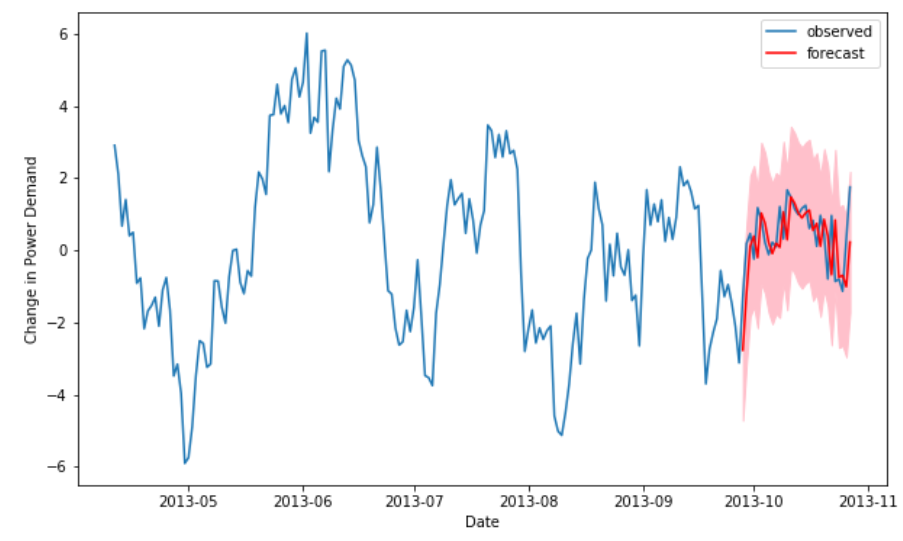

# **Making dynamic predictions**

เอาตัวที่พยากรณ์ไปแล้ว ไปใช้พยากรณ์ในช่วงเวลาถัดๆไป

In [ ]:
results = model.fit()
forecast = results.get_prediction(start=-25, dynamic=True)

# forecast mean
mean_forecast = forecast.predicted_mean

# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

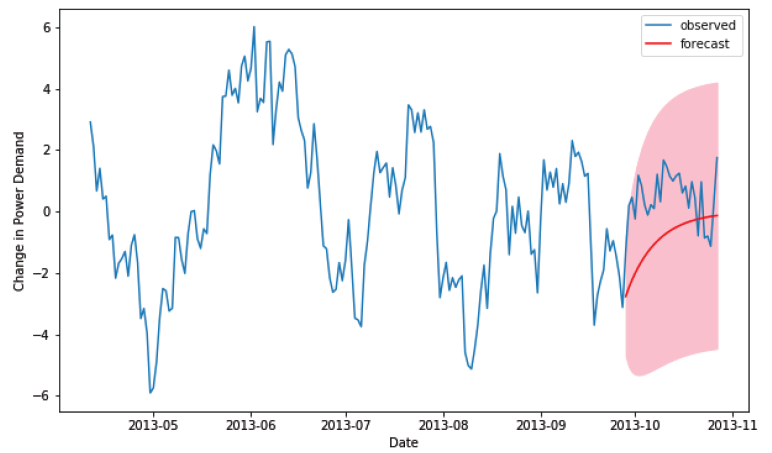

# **Forecasting out of sample**



In [ ]:
forecast = results.get_forecast(steps=20)

# forecast mean
mean_forecast = forecast.predicted_mean

# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()

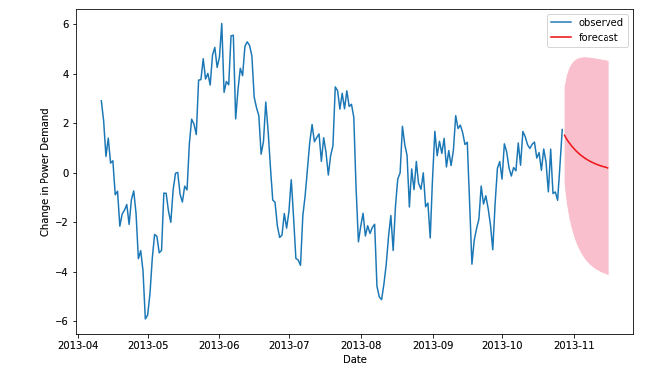



## ***Generating one-step-ahead predictions***

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as `results`.

* Use the results object to make one-step-ahead predictions over the latest 30 days of data and assign the result to `one_step_forecast`.

* Assign your mean predictions to `mean_forecast` using one of the attributes of the `one_step_forecast` object.

* Extract the confidence intervals of your predictions from the `one_step_forecast` object and assign them to `confidence_intervals`.

* Print your mean predictions.

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# เตรียมข้อมูล (ไม่เหมือนเป๊ะ เพราะในเว็บมีข้อมูล interpolate ของวันที่ตลาดหุ้นหยุดทำการด้วย)
amazon = pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)
amazon = amazon.iloc[::-1]

# seasonal_order กดดูจาก .summary()
results = SARIMAX(amazon, order=(3, 1, 3), seasonal_order=(1, 0, [1], 7)).fit()


# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parame

date
2018-12-27    1478.244757
2018-12-28    1466.625808
2018-12-31    1471.604274
2019-01-02    1494.731551
2019-01-03    1536.064348
2019-01-04    1507.460249
2019-01-07    1583.570794
2019-01-08    1629.503081
2019-01-09    1649.517393
2019-01-10    1651.571803
2019-01-11    1658.318648
2019-01-14    1648.251191
2019-01-15    1625.587004
2019-01-16    1671.314773
2019-01-17    1674.427590
2019-01-18    1688.663899
2019-01-22    1700.612441
2019-01-23    1640.716336
2019-01-24    1645.322070
2019-01-25    1650.204094
2019-01-28    1661.078791
2019-01-29    1634.218002
2019-01-30    1602.503227
2019-01-31    1680.989763
2019-02-01    1718.296875
2019-02-04    1614.674531
2019-02-05    1629.555113
2019-02-06    1659.206587
2019-02-07    1651.431731
2019-02-08    1619.634034
Name: predicted_mean, dtype: float64


## ***Plotting one-step-ahead predictions***

Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The `lower_limits`, `upper_limits` and `amazon` DataFrames as well as your mean prediction `mean_forecast` that you created in the last exercise are available in your environment.

* Plot the `amazon` data, using the `amazon.index` as the x coordinates.

* Plot the `mean_forecast` prediction similarly, using `mean_forecast.index` as the x-coordinates.

* Plot a shaded area between `lower_limits` and `upper_limits` of your confidence interval. Use the index of `lower_limits` as the x coordinates.

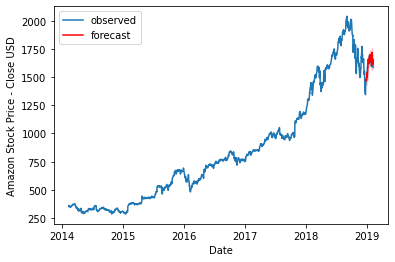

In [32]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

Have a look at your plotted forecast. Is the mean prediction close to the observed values? 

## ***Generating dynamic forecasts***

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.


* Use the `results` object to make a dynamic predictions for the latest 30 days and assign the result to `dynamic_forecast`.

* Assign your predictions to a new variable called `mean_forecast` using one of the attributes of the `dynamic_forecast` object.

* Extract the confidence intervals of your predictions from the `dynamic_forecast` object and assign them to a new variable `confidence_intervals`.

* Print your mean predictions.



In [33]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2018-12-27    1478.244757
2018-12-28    1483.478399
2018-12-31    1476.340486
2019-01-02    1469.221401
2019-01-03    1466.205970
2019-01-04    1475.663176
2019-01-07    1480.873672
2019-01-08    1482.666469
2019-01-09    1474.015603
2019-01-10    1468.908453
2019-01-11    1469.121728
2019-01-14    1478.416283
2019-01-15    1483.759487
2019-01-16    1480.379292
2019-01-17    1471.776005
2019-01-18    1469.225394
2019-01-22    1473.474823
2019-01-23    1481.866498
2019-01-24    1483.198078
2019-01-25    1478.945765
2019-01-28    1469.834863
2019-01-29    1470.791600
2019-01-30    1477.502387
2019-01-31    1484.954343
2019-02-01    1482.504774
2019-02-04    1475.371968
2019-02-05    1470.453564
2019-02-06    1473.092553
2019-02-07    1481.259492
2019-02-08    1486.133261
Name: predicted_mean, dtype: float64


Your dynamical predictions are dynamite! Statsmodels makes it super simple to switch between one-step ahead and dynamical predictions.

## ***Plotting dynamic forecasts***

Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The `lower_limits`, `upper_limits` and `amazon` DataFrames as well as your mean predictions `mean_forecast` that you created in the last exercise are available in your environment.

* Plot the `amazon` data using the dates in the index of this DataFrame as the x coordinates and the values as the y coordinates.

* Plot the `mean_forecast` predictions similarly.

* Plot a shaded area between `lower_limits` and `upper_limits` of your confidence interval. Use the index of one of these DataFrames as the x coordinates.

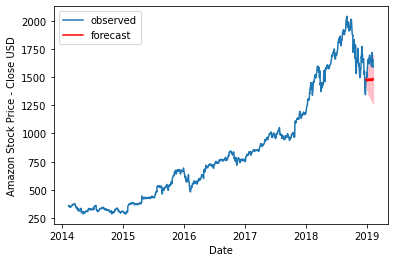

In [34]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

It is very hard to predict stock market performance and so your predictions have a wide uncertainty. However, note that the real stock data stayed within your uncertainty limits!

# **Reconstructing original time series after differencing**



In [ ]:
from numpy import cumsum

diff_forecast = results.get_forecast(steps=10).predicted_mean
mean_forecast = cumsum(diff_forecast)

# **Using the ARIMA model**

* ถ้าใช้ ARIMA ก็จะไม่ต้องมาเปลี่ยน difference กลับไปกลับมา



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(p,d,q))

* $p$ - number of autoregressive lags
* $d$ - order of differencing
* $q$ - number of moving average lags

In [ ]:
# Create model
model = SARIMAX(df, order=(2,1,1))

# Fit model
model.fit()

# Make forecast
mean_forecast = results.get_forecast(steps=10).predicted_mean

# **Picking the difference order of differencing**

In [ ]:
adf = adfuller(df.iloc[:,0])
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])

```
ADF Statistic: -2.674
p-value: 0.0784
```



In [ ]:
adf = adfuller(df.diff().dropna().iloc[:,0])
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])



```
ADF Statistic: -4.978
p-value: 2.44e-05
```

## ***Differencing and fitting ARMA***

* Use the **`.diff()`** method of `amazon` to make the time series stationary by taking the first difference. Don't forget to drop the NaN values using the **`.dropna()`** method.

* Create an ARMA(2,2) model using the **`SARIMAX`** class, passing it the stationary data.

* Fit the model.



In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
amazon = pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)
amazon = amazon.iloc[::-1]

# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2, 0, 2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.158
Date:                Sat, 03 Sep 2022   AIC                          11072.317
Time:                        16:33:11   BIC                          11098.003
Sample:                             0   HQIC                         11081.970
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0770      0.004    259.187      0.000       1.069       1.085
ar.L2         -0.9950      0.004   -273.569      0.000      -1.002      -0.988
ma.L1         -1.0915      0.006   -177.380      0.0

Remember that now you have a model which you can use to predict *the difference values*, not the absolute value of the amazon dataset.

## ***Unrolling ARMA forecast***

Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as `arma_results`. The **`np.cumsum()`** function and the original DataFrame amazon are also available.

* Use the **`.get_forecast()`** method of the `arma_results` object and select the predicted mean of the next 10 differences.

* Use the **`np.cumsum()`** function to integrate your difference forecast.

* Add the last value of the original DataFrame to make your forecast an absolute value.

In [4]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    1593.661840
1259    1601.965750
1260    1605.494615
1261    1601.033119
1262    1592.717018
1263    1588.199621
1264    1591.608598
1265    1599.774692
1266    1605.177749
1267    1602.871874
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


You have just made an ARIMA forecast the hard way. Next you'll use statsmodels to make things easier.

## ***Fitting an ARIMA model***

In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets **`statsmodels`** do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as `amazon` and so is the **`SARIMAX`** model class.

* Create an ARIMA(2,1,2) model, using the **`SARIMAX`** class, passing it the Amazon stocks data `amazon`.

* Fit the model.

* Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to `arima_value_forecast`.

In [5]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    1593.400328
1260    1601.675767
1261    1605.435933
1262    1601.248350
1263    1592.991557
1264    1588.263017
1265    1591.388447
1266    1599.464795
1267    1605.056453
1268    1603.040846
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


You just made the same forecast you made before, but this time with an ARIMA model. Your two forecasts give the same results, but the ARIMA forecast was a lot easier to code!

## ***Choosing ARIMA model***

You are trying to figure out which ARIMA model is the best fit for a dataset after trying different degrees of differencing and applying the Augmented Dicky-Fuller test on the differenced data. The test statistics were these:



```
Order of difference	ADF statistic	p-value
0	                      2.198	      0.999
1	                     -2.598	      0.093
2	                    -14.448	      0.000
3	                    -17.147	      0.000
```

Which kind of ARIMA model should you fit to this time series data?

* **ARIMA(p,2,q)**.   You want to make sure our data is stationary but don't want to over difference it either. This is the right call!

# **Using ACF and PACF to choose model order**

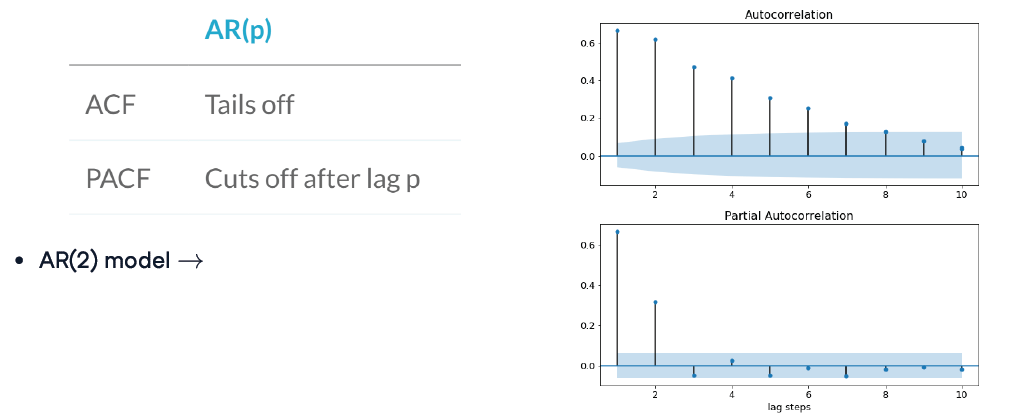

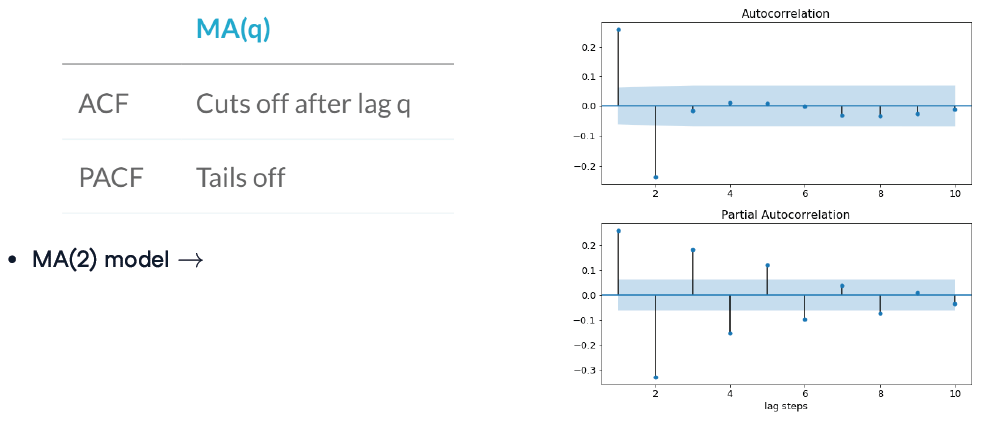

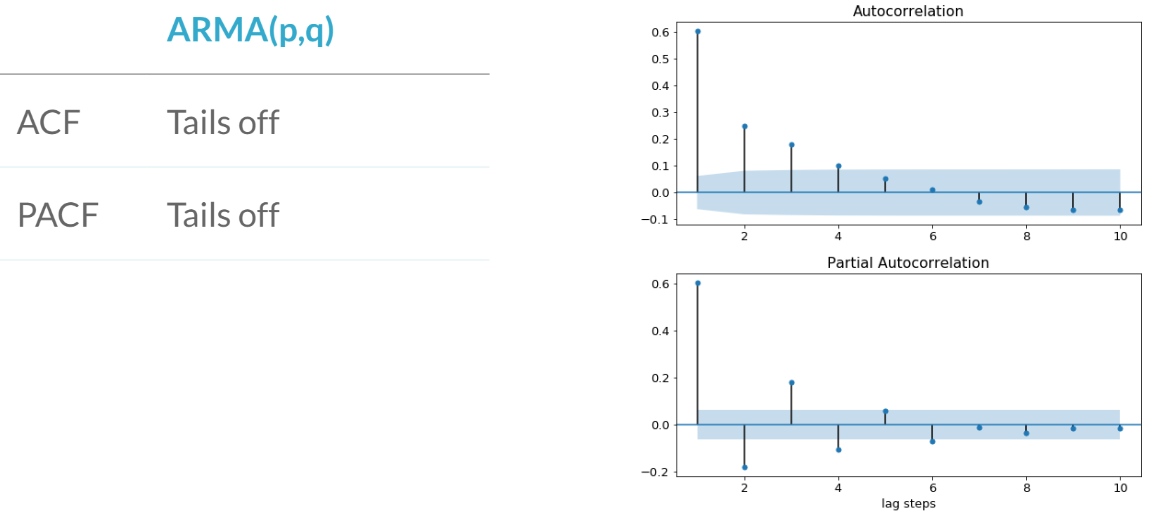

* กรณี ARMA(p,q) ไม่สามารถพิจารณาจากกราฟ ACF และ PACF ได้

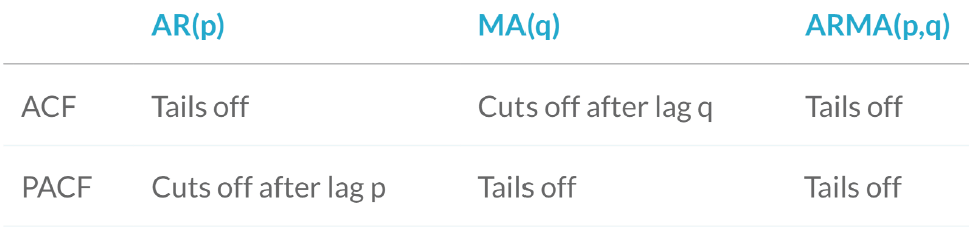


# **Plotting ACF, PACF in Python**

* ***ต้องทำให้ข้อมูลเป็น stationary ก่อนจึงจะนำมาพล็อตได้***

* รูปนี้คือ ไม่ stationary

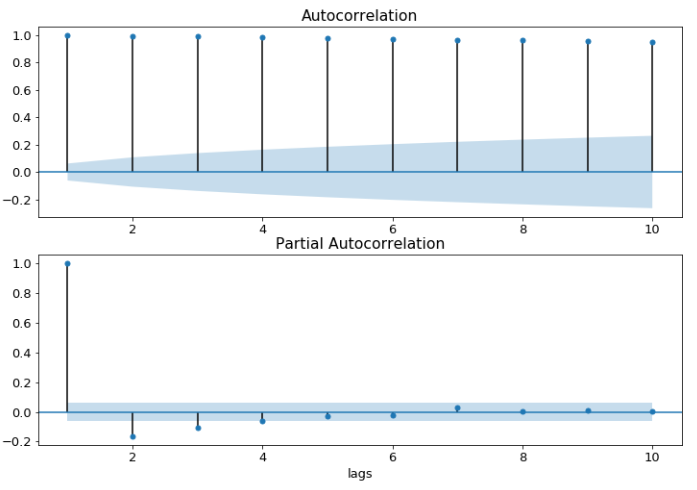

* รูปนี้คือ ทำ difference มากไป

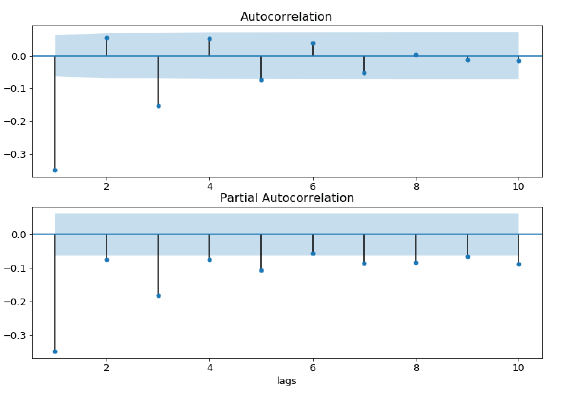

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Create figure
fig, (ax1, ax2) = plt.subplots()

# Make ACF plot
plot_acf(df, lags=10, zero=False, ax=ax1)

# Make PACF plot
plot_pacf(df, lags=10, zero=False, ax=ax2)
plt.show()

## ***AR or MA***

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

A time series with unknown properties, `df` is available for you in your environment.


* Plot the ACF and the PACF for the series `df` for the first 10 lags but not the zeroth lag.

In [ ]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

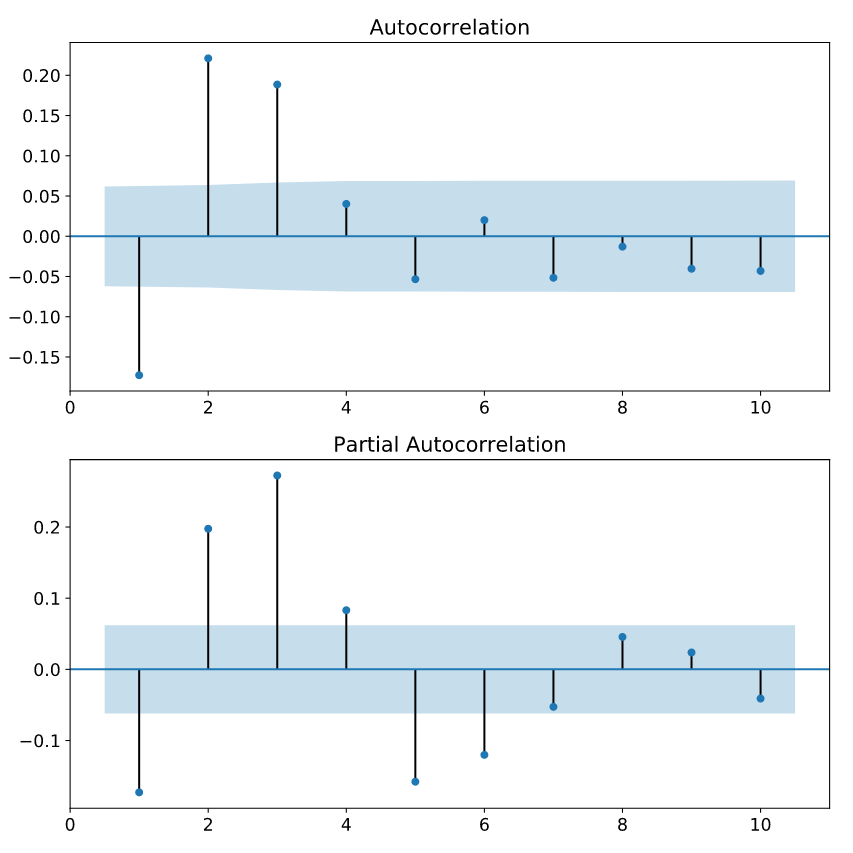

* The ACF cuts off after 3 lags and the PACF tails off.  So this is an MA(3).

## ***Order of earthquakes***

* Create and train a model object for the earthquakes time series.

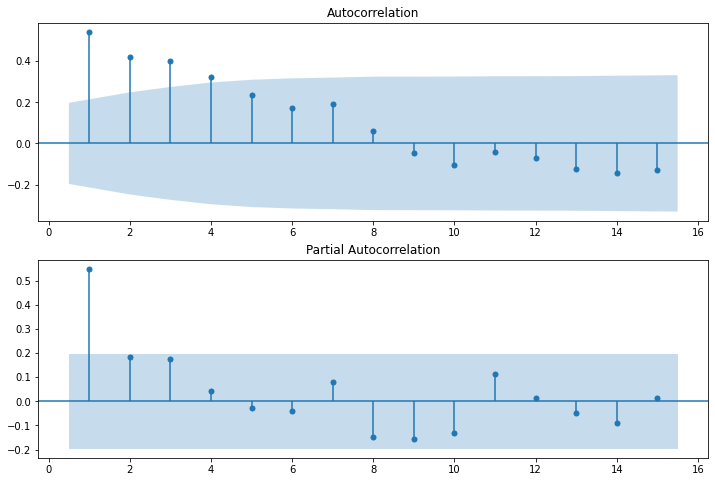

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 0)   Log Likelihood                -331.323
Date:                  Sat, 03 Sep 2022   AIC                            666.646
Time:                          18:19:56   BIC                            671.836
Sample:                      01-01-1900   HQIC                           668.746
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9433      0.029     32.767      0.000       0.887       1.000
sigma2        46.2114      5.459      8.466      0.000      35.513      56.910
Ljung-Box (L1) (Q):                 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [10]:
earthquake = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=['date']).drop(columns='Year')

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, zero=False, lags=15, ax=ax1)
plot_pacf(earthquake, zero=False, lags=15, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = SARIMAX(earthquake, order=(1, 0, 0)).fit()
print(model.summary())

# **จะใช้ AIC หรือ BIC ในการเลือกแบบจำลอง ARIMA**

* ใช้ AIC ถ้าต้องการเน้นการพยากรณ์
* ใช้ BIC ถ้าต้องการเน้นแบบจำลองที่อธิบายได้ง่าย

In [ ]:
# Create model
model = SARIMAX(df, order=(1,0,1))

# Fit model
results = model.fit()

# Print AIC and BIC
print('AIC:', results.aic)
print('BIC:', results.bic)

```
AIC: 2,806.36
BIC: 2,821.09
```
# ***Searching over model order***

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.
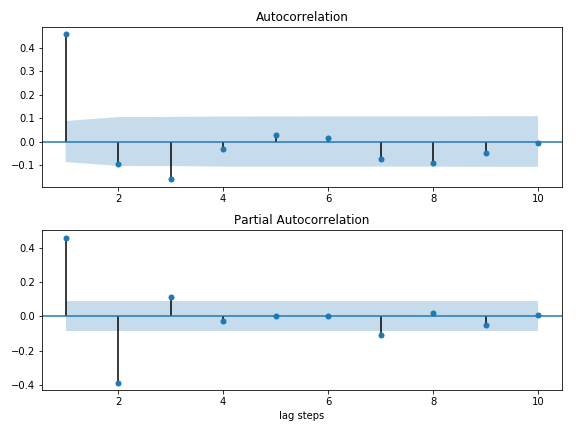

The **`SARIMAX`** model class and the time series DataFrame `df` are available in your environment.

* Loop over values of `p` from 0-2.
* Loop over values of `q` from 0-2.
* Train and fit an ARMA(p,q) model.
* Append a tuple of `(p,q, AIC value, BIC value)` to `order_aic_bic`.

In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p, 0, q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

## ***Choosing order with AIC and BIC***

Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

The list of tuples of `(p,q, AIC value, BIC value)` that you created in the last exercise, `order_aic_bic`, is available in your environment. `pandas` has also been imported as `pd`.

* Create a DataFrame to hold the order search information in the `order_aic_bic` list. Give it the column names `['p', 'q', 'AIC', 'BIC']`.
* Print the DataFrame in order of increasing AIC and then BIC.

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(data=order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values(by='AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values(by='BIC'))



```
       p  q          AIC          BIC
    7  2  1  1414.248679  1431.107112
    8  2  2  1416.084892  1437.157932
    5  1  2  1417.029939  1433.888371
    6  2  0  1419.109454  1431.753279
    2  0  2  1425.057439  1437.701264
    4  1  1  1428.051695  1440.695520
    1  0  1  1429.988724  1438.417940
    3  1  0  1497.307531  1505.736748
    0  0  0  1615.493870  1619.708478


       p  q          AIC          BIC
    7  2  1  1414.248679  1431.107112
    6  2  0  1419.109454  1431.753279
    5  1  2  1417.029939  1433.888371
    8  2  2  1416.084892  1437.157932
    2  0  2  1425.057439  1437.701264
    1  0  1  1429.988724  1438.417940
    4  1  1  1428.051695  1440.695520
    3  1  0  1497.307531  1505.736748
    0  0  0  1615.493870  1619.708478
```
This time AIC and BIC favored the same model, ARMA(2, 1), but this won't always be the case.

## ***AIC and BIC vs ACF and PACF***

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

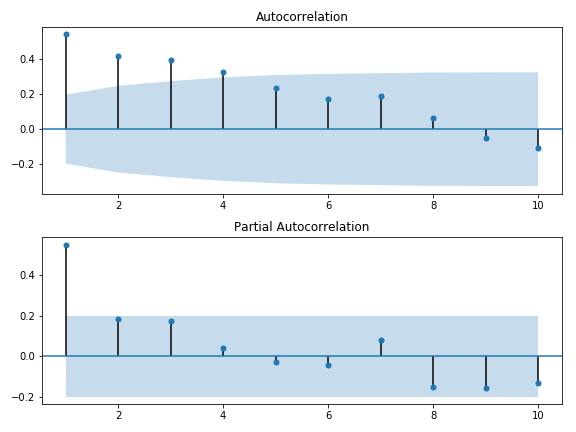

The **`SARIMAX`** model class and the time series DataFrame `earthquake` are available in your environment.

* Loop over orders of `p` and `q` between `0` and `2`.

* Inside the loop try to fit an ARMA(p,q) to `earthquake` on each loop.

* Print `p` and `q` alongside AIC and BIC in each loop.

* If the model fitting procedure fails print `p`, `q`, `None`, `None`.

In [9]:
earthquake = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=['date']).drop(columns='Year')
earthquake.index = pd.DatetimeIndex(earthquake.index.values, freq=earthquake.index.inferred_freq) # suppress warning message

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except ValueError:
            print(p, q, None, None)     


0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812265 804.8644124814957
0 2 761.0674787503883 768.8528383007921
1 0 666.6455255041615 671.8357652044307
1 1 647.132299967383 654.9176595177868
1 2 648.7385664620779 659.1190458626162
2 0 656.0283744146396 663.8137339650434
2 1 648.8428399959414 659.2233193964797
2 2 648.8506443433448 661.8262435940178


# **Residuals**

$
\begin{align*}
\hat{y}_{t+1} & = \hat{\alpha} y_t + \hat\epsilon_{t+1} \ \ \text{One-step ahead forecast}\\
y_{t+1} & \ \ \ \text{True value}\\
residual_{t+1} & = \hat{y}_{t+1} - y_{t+1}
\end{align*}
$

In [ ]:
# Fit model
model = SARIMAX(df, order=(p,d,q))
results = model.fit()

# Assign residuals to variable
residuals = results.resid  

# **Mean absolute error (MAE)**

* How far our predictions from the real values?

In [ ]:
mae = np.mean(np.abs(residuals))

# **Plot diagnostics**

If the model fits well the residuals will be white Gaussian noise.

In [ ]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

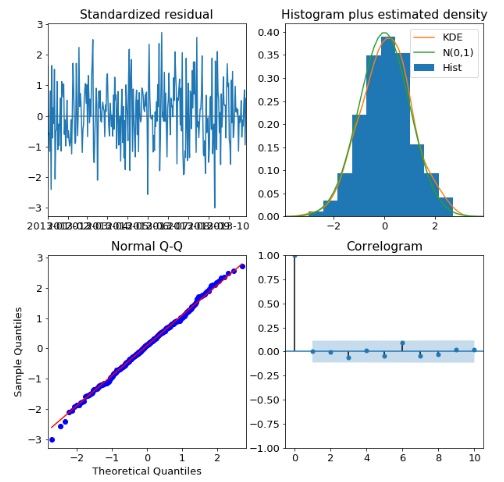

# **Residulas plot**

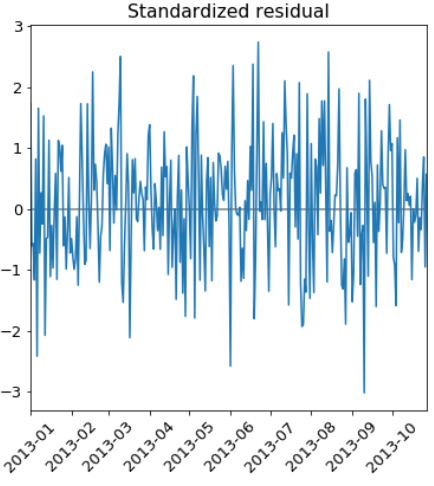

* If our model is working correctly, there should be no obvious structure in the residuals.

## ***Mean absolute error***

Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

`numpy` has been imported into your environment as `np` and the earthquakes time series is available for you as `earthquake`.

* Use `np` functions to calculate the Mean Absolute Error (MAE) of the **`.resid`** attribute of the results object.

* Print the MAE.

* Use the DataFrame's **`.plot()`** method with no arguments to plot the earthquake time series.

4.755625670994196


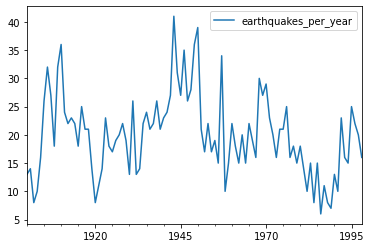

In [10]:
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

Your mean error is about 4-5 earthquakes per year. You have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.

## ***Diagnostic summary statistics***

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

```
Test	                 Null hypothesis	                         P-value name
Ljung-Box	         There are no correlations in the residual     Prob(Q)
Jarque-Bera	       The residuals are normally distributed	       Prob(JB)
```

An unknown time series `df` and the **`SARIMAX`** model class are available for you in your environment.

* Fit an ARMA(3,1) model to the time series `df`.
* Print the model summary.

In [ ]:
# Create and fit model
model1 = SARIMAX(df, order=(3, 0, 1))
results1 = model1.fit()

# Print summary
print(results1.summary())



```
                                 SARIMAX Results                                
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                  400
    Model:               SARIMAX(3, 0, 1)   Log Likelihood                -555.968
    Date:                Mon, 05 Sep 2022   AIC                           1121.936
    Time:                        19:00:11   BIC                           1141.893
    Sample:                    01-01-2013   HQIC                          1129.839
                             - 02-04-2014                                         
    Covariance Type:                  opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1          0.0096      0.109      0.089      0.929      -0.203       0.223
    ar.L2          0.2150      0.052      4.152      0.000       0.114       0.317
    ar.L3         -0.4525      0.051     -8.948      0.000      -0.552      -0.353
    ma.L1         -0.2552      0.114     -2.243      0.025      -0.478      -0.032
    sigma2         0.9415      0.065     14.427      0.000       0.814       1.069
    ===================================================================================
    Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.73
    Prob(Q):                              0.99   Prob(JB):                         0.69
    Heteroskedasticity (H):               1.21   Skew:                            -0.07
    Prob(H) (two-sided):                  0.27   Kurtosis:                         3.15
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```

* Since Prob(Q) = 0.99 and Prob(JB) = 0.69, residuals are not correlated and are normally distributed.

* Fit an AR(2) model to the time series `df`.
* Print the model summary.





In [ ]:
# Create and fit model
model2 = SARIMAX(df, order=(2, 0 ,0))
results2 = model2.fit()

# Print summary
print(results2.summary())



```
                               SARIMAX Results                                
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                  400
    Model:               SARIMAX(2, 0, 0)   Log Likelihood                -591.188
    Date:                Mon, 05 Sep 2022   AIC                           1188.377
    Time:                        19:03:13   BIC                           1200.351
    Sample:                    01-01-2013   HQIC                          1193.119
                             - 02-04-2014                                         
    Covariance Type:                  opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1         -0.3072      0.047     -6.545      0.000      -0.399      -0.215
    ar.L2          0.2675      0.045      5.985      0.000       0.180       0.355
    sigma2         1.1243      0.082     13.732      0.000       0.964       1.285
    ===================================================================================
    Ljung-Box (L1) (Q):                   4.35   Jarque-Bera (JB):                 0.24
    Prob(Q):                              0.04   Prob(JB):                         0.89
    Heteroskedasticity (H):               1.18   Skew:                            -0.02
    Prob(H) (two-sided):                  0.34   Kurtosis:                         2.89
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```
* Residuals are correlated and are normally distributed. This model didn't pull out all the correlations in the data. This suggests we could make it better. Perhaps by increasing the model order.

## ***Plot diagnostics***

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

```
Test	                                               Good fit
Standardized residual                     	There are no obvious patterns in the residuals
Histogram plus kde estimate	                The KDE curve should be very similar to the normal distribution
Normal Q-Q	                                Most of the data points should lie on the straight line
Correlogram	                                95% of correlations for lag greater than zero should not be significant
```

An unknown time series `df` and the **`SARIMAX`** model class are available for you in your environment.


* Fit an ARIMA(1,1,1) model to the time series `df`.
* Create the 4 diagnostic plots.

In [ ]:
# Create and fit model
model = SARIMAX(df, order=(1, 1, 1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()  

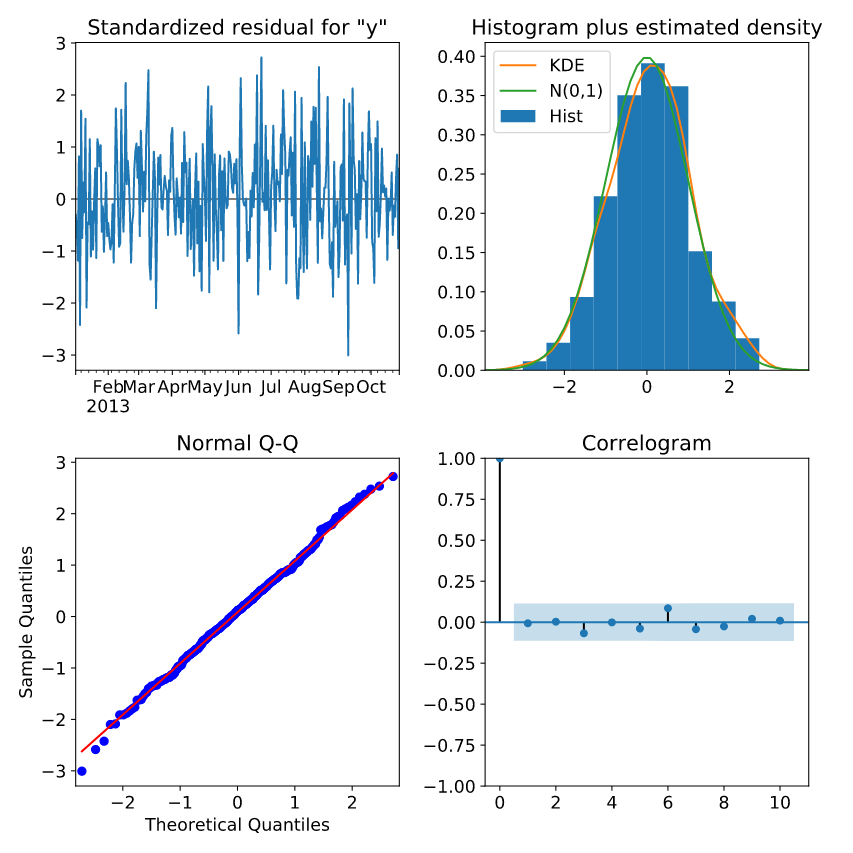

These plots indicate that the model is working properly

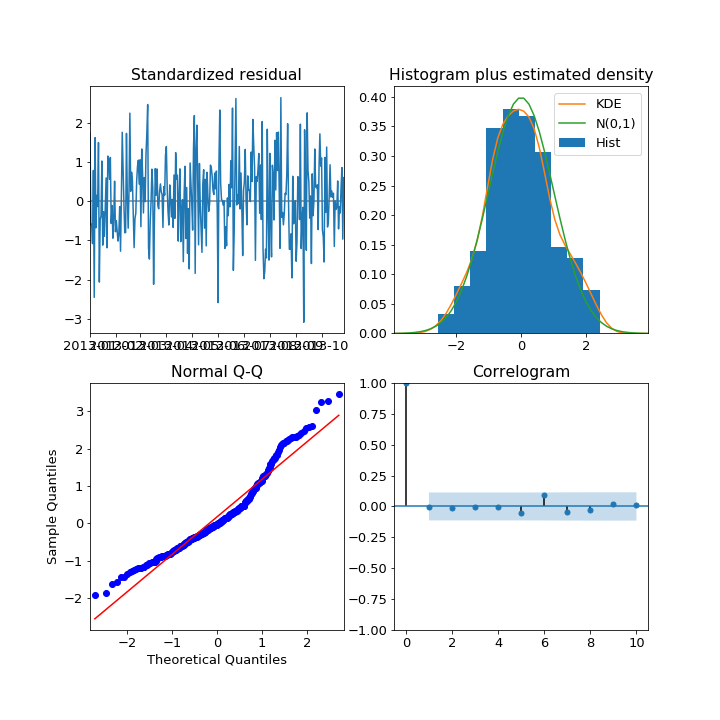

* If the plots look like above, the Q-Q plot deviates significantly from a straight line! This suggests the model could be improved.

# **Identification tools**

* Plot the time series
   * `df.plot()`

* Use augmented Dicky-Fuller test
   * `adfuller()`

* Use transforms and/or differencing
   * `df.diff()` , `np.log()` , `np.sqrt()`

* Plot ACF/PACF
   * `plot_acf()` , `plot_pacf()`

# **Estimation**

   * `model.fit()`

* Choose between models using AIC and BIC

   `results.aic` , `results.bic`

# **Model diagnostics**

* Are the residuals uncorrelated
* Are residuals normally distributed
   * `results.plot_diagnostics()`
   * `results.summary()`

# **Forecast**

* `results.get_forecast()`

## ***Identification***

In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

The time series has been loaded in as a DataFrame `savings` and the **`adfuller()`** function has been imported.

```
            savings
date               
1955-01-01      4.9
1955-04-01      5.2
1955-07-01      5.7
1955-10-01      5.7
1956-01-01      6.2
...             ...
1979-04-01      5.0
1979-07-01      4.8
1979-10-01      4.7
1980-01-01      5.0
1980-04-01      5.4

[102 rows x 1 columns]
```
* Plot the time series using the DataFrame's **`.plot()`** method.

* Apply the Dicky-Fuller test to the `'savings'` column of the savings DataFrame and assign the test outcome to `result`.
* Print the Dicky-Fuller test statistics and the associated p-value.



In [ ]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

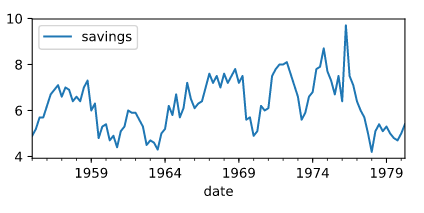

```
-3.185899096242141
0.020815541644114092
```

The Dicky-Fuller test says that the series is stationary. You can confirm this when you look at the plot. There is one fairly high value is 1976 which might be anomalous, but you will leave that for now.

## ***Identification II***

You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

The **`plot_acf()`** and the **`plot_pacf()`** functions have been imported and the time series has been loaded into the DataFrame `savings`.

* Make a plot of the ACF, for lags 1-10 and plot it on axis `ax1`.
* Do the same for the PACF.

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, zero=False, lags=10, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, zero=False, lags=10, ax=ax2)

plt.show()

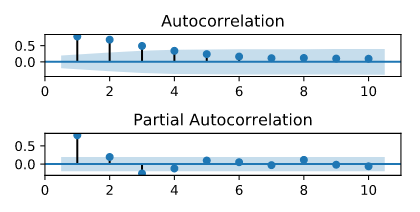

The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.

## ***Estimation***

In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

The time series `savings` has been loaded and the **`SARIMAX`** class has been imported into your environment.

* Loop over values of `p` from `0` to `3` and values of `q` from `0` to `3`.

* Inside the loop, create an ARMA(p,q) model with a constant trend.

* Then fit the model to the time series `savings`.

* At the end of each loop print the values of `p` and `q` and the AIC and BIC.

In [ ]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p, 0, q), trend='c')
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)



```
    0 0 313.6028657326894 318.85281135925794
    0 1 267.0697097688693 274.9446282087221
    0 2 232.16782676455583 242.66771801769292
    0 3 217.59720511188732 230.7220691783087
    1 0 216.20348059024255 224.07839903009537
    1 1 215.70038963867412 226.20028089181122
    1 2 207.65298608432968 220.77785015075102
    1 3 209.57498691603405 225.3248237957397
    2 0 213.9723232754361 224.4722145285732
    2 1 213.43035679065048 226.55522085707184
    2 2 209.57903436793134 225.32887124763698
    2 3 211.5750320892991 229.94984178228898
    3 0 209.54493107911944 222.66979514554077
    3 1 210.82147634942768 226.5713132291333
    3 2 211.45759881818142 229.8324085111713
    3 3 213.54388380412843 234.54366631040259
```
You didn't store and sort your results this time. But the AIC and BIC both picked the ARMA(1,2) model as the best and the AR(3) model as the second best.

## ***Diagnostics***

You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

The time series `savings` has been loaded and the **`SARIMAX`** class has been imported into your environment.

* Retrain the ARMA(1,2) model on the time series, setting the trend to constant.

* Create the 4 standard diagnostics plots.

* Print the model residual summary statistics.


In [ ]:
# Create and fit model
model = SARIMAX(savings, order=(1, 0, 2), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())

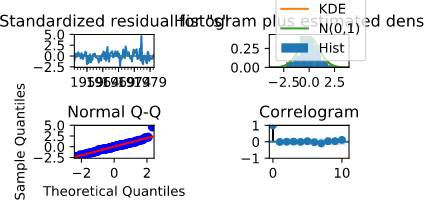

The JB p-value is zero, which means you should reject the null hypothesis that the residuals are normally distributed. However, the histogram and Q-Q plots show that the residuals look normal. This time the JB value was thrown off by the one outlying point in the time series. In this case, you could go back and apply some transformation to remove this outlier or you probably just continue to the production stage.

# **Seasonal Decomposition**

Each time series consists of:

* Trend
* Seasonal component
* Residuals

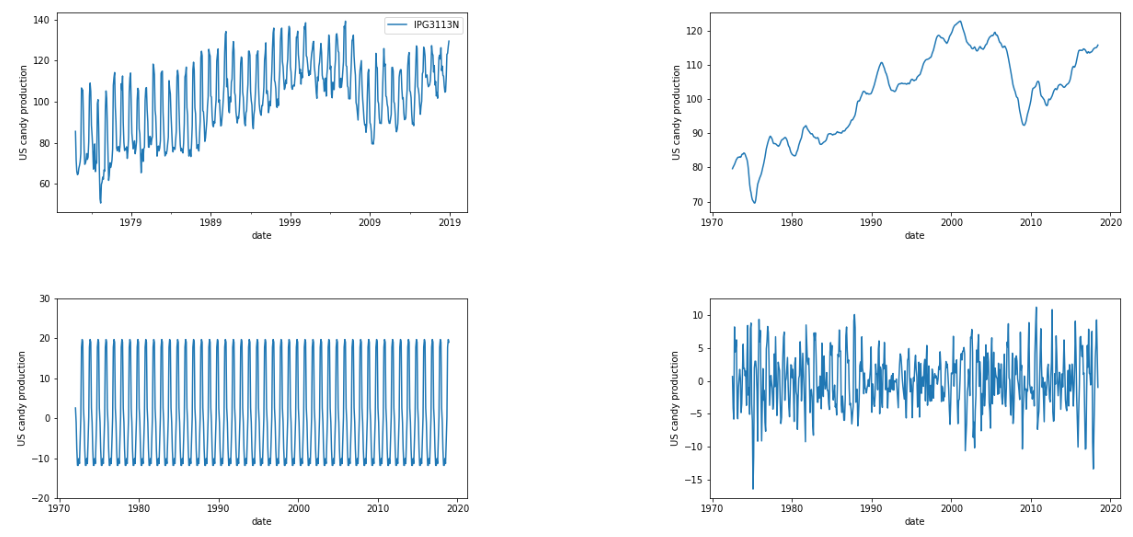





* $$\text{Time series} = \text{trend} + \text{seasonal} + \text{residual}$$

# **Seasonal decomposition using statsmodels**


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose data
decomp_results = seasonal_decompose(df['IPG3113N'], period=12)
decomp_results.plot()
plt.show()

  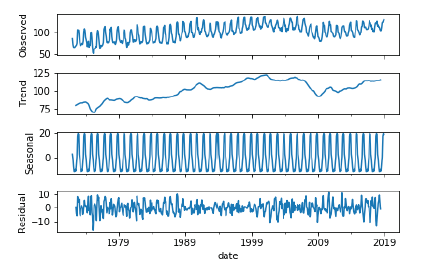

# **Finding seasonal period using ACF**

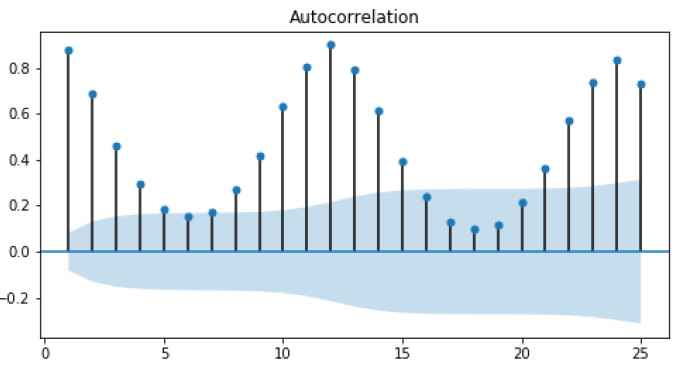

* The above repeat every 12 periods (ถ้าไม่ Stationary ต้องทำการ detrend ก่อน)
   * ทำ difference
   * ลบออกด้วย rolling mean

# **Detrending time series**



In [ ]:
# Subtract long rolling average over N steps
df = df - df.rolling(N).mean()

# Drop NaN values
df = df.dropna()

## ***Seasonal decompose***

You can think of a time series as being composed of **trend**, **seasonal** and **residual** components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

The milk production time series has been loaded in to the DataFrame `milk_production` and is available in your environment.

* Decompose the `'pounds_per_cow'` column of `milk_production` using an additive model and period of 12 months.

* Plot the decomposition.

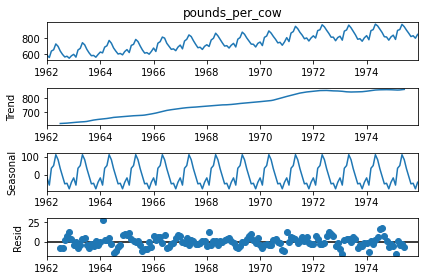

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

milk_production = pd.read_csv('milk_production.csv', index_col='date', parse_dates=True)

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot()
plt.show()

You have extracted the seasonal cycle and now you can see the trend much more clearly.

## ***Seasonal ACF and PACF***

Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have.

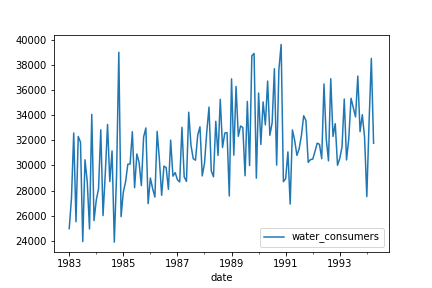

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by ***subtracting the moving average***. Remember that you could use a window size of any value bigger than the likely period.

The **`plot_acf()`** function has been imported and the time series has been loaded in as `water`.

* Plot the ACF of the `'water_consumers'` column of the time series up to 25 lags.

In [ ]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

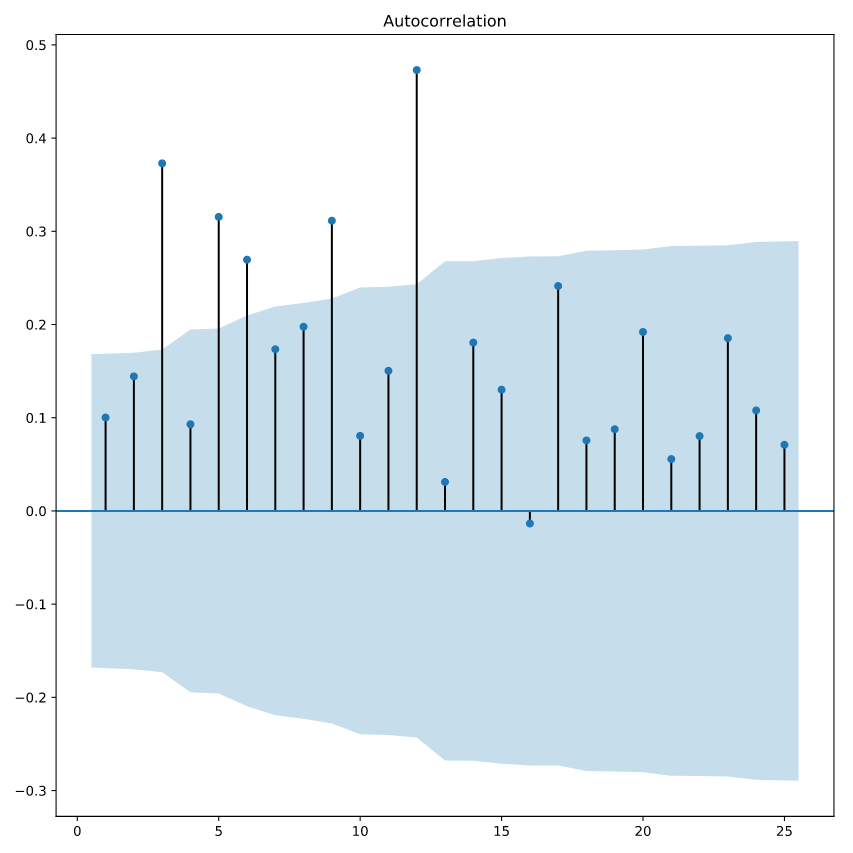

* Subtract a 15 step rolling mean from the original time series and assign this to water_2
Drop the NaN values from water_2

In [ ]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

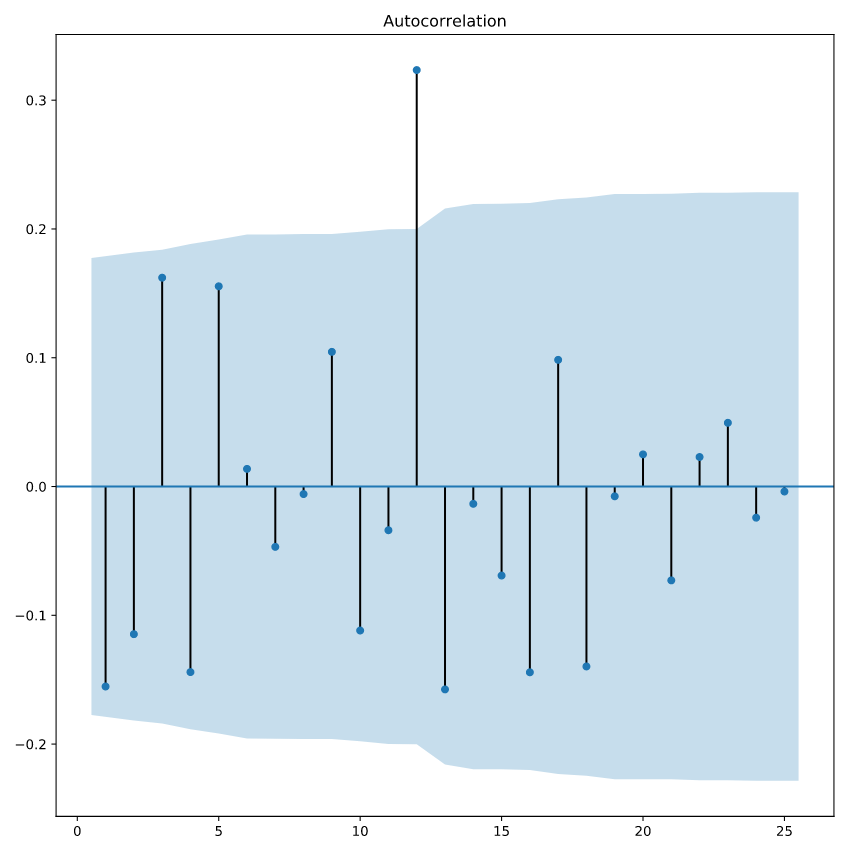

Although you couldn't see it by looking at the time series itself, the ACF shows that there is an seasonal component with time periods = 12 and so including it will make your predictions better.

## **The SARIMA Model**

* ARIMA(2, 0, 1):
$$y_t = a_1y_{t-1} + a_2y_{t-2} + m_1ɛ_{t-1} + \varepsilon_t$$

* SARIMA(0, 0, 0)(2, 0, 1, 7) (7 days)
$$y_t = a_7y_{t-1} + a_{14}y_{t-14} + m_7ɛ_{t-7} + \varepsilon_t$$

## **Fitting a SARIMA model**



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate model
model = SARIMAX(df, order=(p,d,q), seasonal_order=(P,D,Q,S))

# Fit model
results = model.fit()

# **Seasonal differencing**

* ถ้า time series มี trend ก็ใช้ difference ค่าในช่วงเวลาที่แล้ว ตามปกติ 
* ถ้า time series มีลักษณะความเป็นวัฏจักรที่มาก จะต้อง Subtract the time series value of one season ago

$$\Delta y_t = y_t - y_{t-S}$$



In [ ]:
# Take the seasonal difference
df_diff = df.diff(S)

## ***Fitting SARIMA models***

Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

The time series DataFrames `df1`, `df2` and `df3` and the **`SARIMAX`** model class are available in your environment.

* Create a SARIMAX(1,0,0)(1,1,0, 7) model and fit it to `df1`.
Print the model summary table.

* Create a SARIMAX(2,1,1)(1,0,0, 4) model and fit it to `df2`.
* Create a SARIMAX(1,1,0)(0,1,1, 12) model and fit it to `df3`.

In [ ]:
# Create a SARIMAX model
model = SARIMAX(df1, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())



```
                                      SARIMAX Results                                     
    =========================================================================================
    Dep. Variable:                                 Y   No. Observations:                   90
    Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.320
    Date:                           Tue, 06 Sep 2022   AIC                           1118.640
    Time:                                   20:30:15   BIC                           1125.896
    Sample:                               01-01-2013   HQIC                          1121.555
                                        - 03-31-2013                                         
    Covariance Type:                             opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1          0.1025      0.103      0.995      0.320      -0.099       0.304
    ar.S.L7        0.2811      0.105      2.690      0.007       0.076       0.486
    sigma2      3.865e+04   7259.157      5.325      0.000    2.44e+04    5.29e+04
    ===================================================================================
    Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.70
    Prob(Q):                              0.97   Prob(JB):                         0.43
    Heteroskedasticity (H):               1.34   Skew:                            -0.14
    Prob(H) (two-sided):                  0.45   Kurtosis:                         2.36
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```



In [ ]:
# Create a SARIMAX model
model = SARIMAX(df2, order=(2, 1, 1), seasonal_order=(1, 0, 0, 4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())



```
                                      SARIMAX Results                                      
    ==========================================================================================
    Dep. Variable:                                  Y   No. Observations:                   80
    Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
    Date:                            Tue, 06 Sep 2022   AIC                           1130.679
    Time:                                    20:33:17   BIC                           1142.526
    Sample:                                01-01-2013   HQIC                          1135.426
                                         - 03-21-2013                                         
    Covariance Type:                              opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
    ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
    ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
    ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
    sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
    ===================================================================================
    Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
    Prob(Q):                              1.00   Prob(JB):                         0.62
    Heteroskedasticity (H):               0.60   Skew:                            -0.07
    Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```



In [ ]:
# Create a SARIMAX model
model = SARIMAX(df3, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())



```
                                      SARIMAX Results                                       
    ============================================================================================
    Dep. Variable:                                    Y   No. Observations:                  100
    Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.375
    Date:                              Tue, 06 Sep 2022   AIC                           1048.749
    Time:                                      20:37:13   BIC                           1056.147
    Sample:                                  01-01-2013   HQIC                          1051.728
                                           - 04-10-2013                                         
    Covariance Type:                                opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1          0.4236      0.090      4.719      0.000       0.248       0.600
    ma.S.L12      -0.0899      0.116     -0.776      0.438      -0.317       0.137
    sigma2      9347.1461   1407.500      6.641      0.000    6588.497    1.21e+04
    ===================================================================================
    Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.02
    Prob(Q):                              0.86   Prob(JB):                         0.99
    Heteroskedasticity (H):               0.77   Skew:                             0.02
    Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```

You have now got to grips with the seasonal and non-seasonal model orders. Did you notice how the parameters for the seasonal and non-seasonal AR and MA coefficients are printed in the results table?

## ***Choosing SARIMA order***

In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

```
                  AR(p)	                        MA(q)	               ARMA(p,q)
ACF	    Tails off	                         Cuts off after lag q	     Tails off
PACF	  Cuts off after lag p	             Tails off	               Tails off
```

The DataFrame `aus_employment` and the functions **`plot_acf()`** and **`plot_pacf()`** are available in your environment.

Note that you can take multiple differences of a DataFrame using `df.diff(n1).diff(n2)`.

* Take the first order difference and the seasonal difference of the `aus_employment` and drop the `NaN` values. The seasonal period is 12 months.
* Plot the ACF and PACF of `aus_employment_diff` up to 11 lags.



In [ ]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, zero=False, lags=11, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, zero=False, lags=11, ax=ax2)

plt.show()

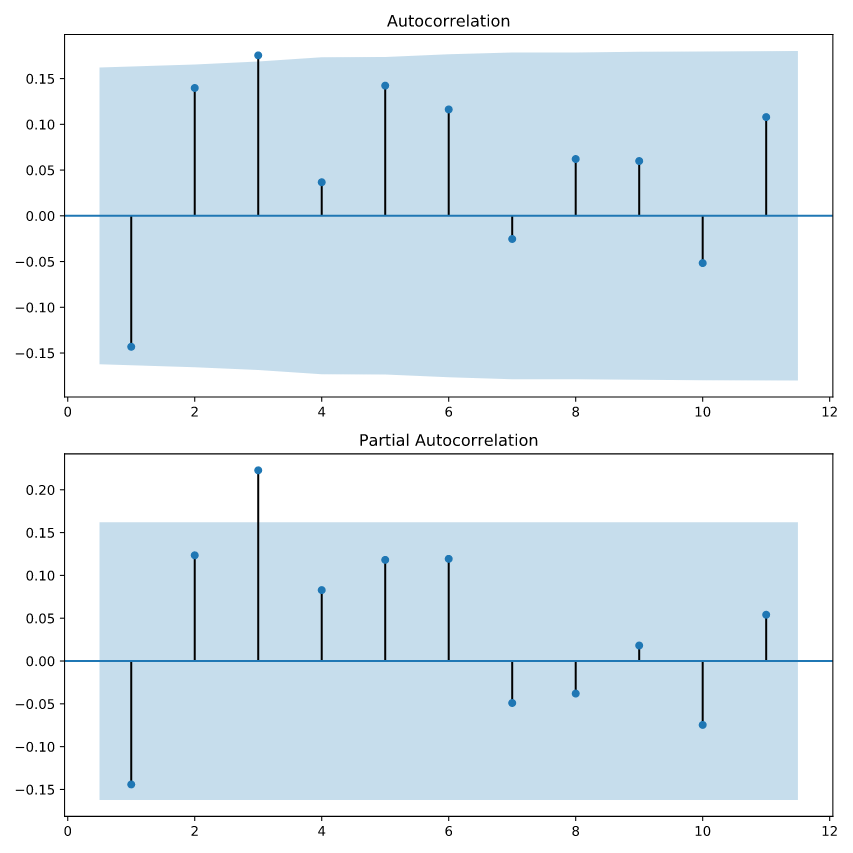

* Make a list of the first 5 seasonal lags and assign the result to `lags`.
* Plot the ACF and PACF of `aus_employment_diff` for the first 5 seasonal lags.

In [ ]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, zero=False, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, zero=False, lags=lags, ax=ax2)

plt.show()

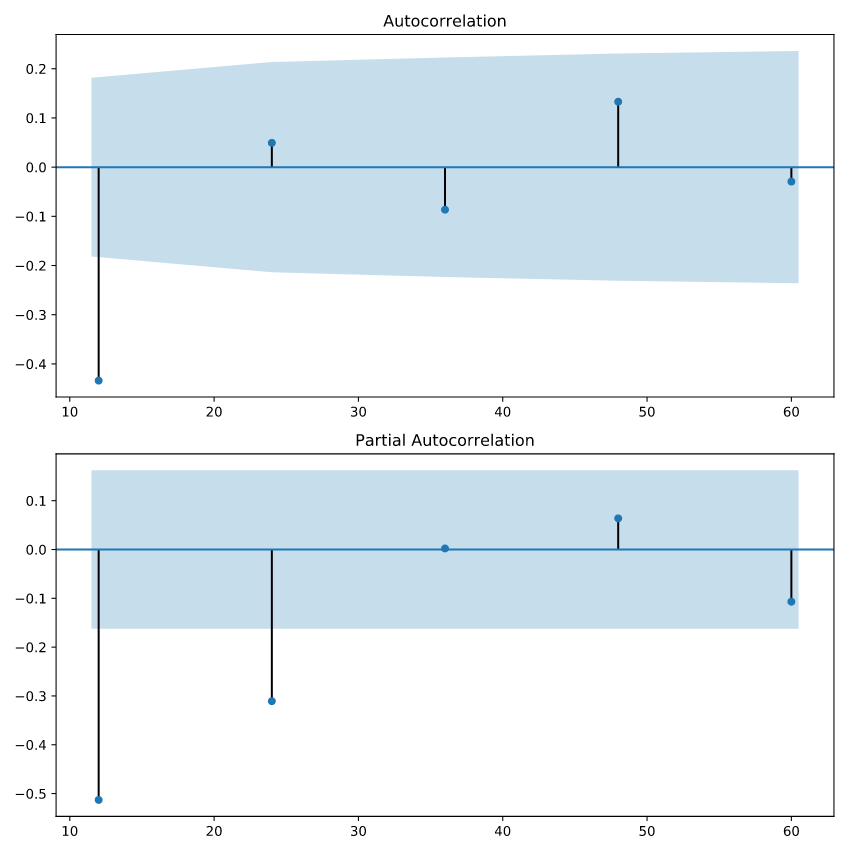

This is SARIMAX(0,1,0)(0,1,1, 12). The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these. The Seasonal ACF and PACF look like an MA(1) model. We select the model that combines both of these.

## ***SARIMA vs ARIMA forecasts***

In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1,12), have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, `wisconsin_test`.

The fitted ARIMA results object and the fitted SARIMA results object are available in your environment as `arima_results` and `sarima_results`.

* Create a forecast object, called `arima_pred`, for the ARIMA model to forecast the next 25 steps after the end of the training data.

Extract the forecast **`.predicted_mean` attribute from `arima_pred` and assign it to `arima_mean`.

* Repeat the above two steps for the SARIMA model.

* Plot the SARIMA and ARIMA forecasts and the held out data `wisconsin_test`.


In [ ]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

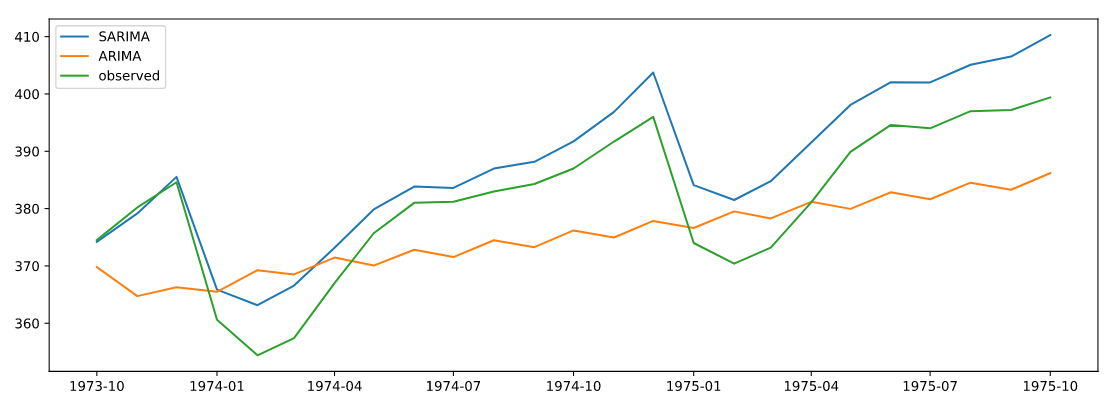

You can see that the SARIMA model has forecast the upward trend and the seasonal cycle, whilst the ARIMA model has only forecast the upward trend with an added wiggle. This makes the SARIMA forecast much closer to the truth for this seasonal data!

In [4]:
import pmdarima as pm

results = pm.auto_arima(df)



```
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2648.467, BIC=2656.490, Fit time=0.062 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=2279.986, BIC=2296.031, Fit time=1.171 seconds
...
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 1, 1, 12); AIC=2173.508, BIC=2213.621, Fit time=12.487 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 1, 0, 12); AIC=2297.305, BIC=2329.395, Fit time=2.087 seconds
Total fit time: 245.812 seconds
```

# **Non-seasonal search parameters**



In [ ]:
results = pm.auto_arima( df, # data 
                        d=0, # non-seasonal difference order
                        start_p=1, # initial guess for p
                        start_q=1, # initial guess for q 
                        max_p=3, # max value of p to test
                        max_q=3, # max value of q to test
                        seasonal=True, # is the time series seasonal
                        m=7, # the seasonal period
                        D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=2, # max value of P to test
                        max_Q=2, # max value of Q to test
                        information_criterion='aic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True, # apply intelligent order search
                        )

# **Saving model objects**



In [ ]:
import joblib

# Select a filepath
filepath ='localpath/great_model.pkl'

# Save model to filepath
joblib.dump(model_results_object, filepath)

# Load model object from filepath
model_results_object = joblib.load(filepath)

# **Updating model**

In [ ]:
# Add new observations and update parameters
model_results_object.update(df_new)

## ***Automated model selection***

The **`pmdarima`** package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the **`pmdarima`** package to automatically choose model orders for some time series datasets.

Be careful when setting the model parameters, if you set them incorrectly your session may time out.

Three datasets are available in your environment as `df1`, `df2` and `df3`.

* Model the time series `df1` with period 7 days and set first order seasonal differencing and no non-seasonal differencing.


* Create a model to fit `df2`. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.


* Fit a SARIMAX(p,1,q)(P,1,Q, 7) model to the data setting `start_p`, `start_q`, `max_p`, `max_q`, `max_P` and `max_Q` to 1.

In [ ]:
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7 ,
                      d=0, D=1, 
                 	    max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())



```
Performing stepwise search to minimize aic
     ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=2.90 sec
     ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=91.630, Time=0.06 sec
     ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=91.508, Time=0.39 sec
     ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.44 sec
     ARIMA(0,0,0)(0,1,0)[7]             : AIC=89.631, Time=0.10 sec
     ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=91.596, Time=0.44 sec
     ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.90 sec
     ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.04 sec
     ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=92.332, Time=0.07 sec
     ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=92.763, Time=0.08 sec
     ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=93.838, Time=0.12 sec
    
    Best model:  ARIMA(0,0,0)(0,1,0)[7]          
    Total fit time: 8.580 seconds
                                    SARIMAX Results                                
    ===============================================================================
    Dep. Variable:                       y   No. Observations:                   35
    Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                 -43.816
    Date:                 Tue, 06 Sep 2022   AIC                             89.631
    Time:                         21:26:02   BIC                             90.964
    Sample:                              0   HQIC                            90.039
                                      - 35                                         
    Covariance Type:                   opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    sigma2         1.3388      0.454      2.946      0.003       0.448       2.229
    ===================================================================================
    Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                 0.69
    Prob(Q):                              0.23   Prob(JB):                         0.71
    Heteroskedasticity (H):               2.86   Skew:                             0.05
    Prob(H) (two-sided):                  0.13   Kurtosis:                         2.24
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```





In [ ]:
# Create model
model2 = pm.auto_arima(df2,
                      d=1,
                      seasonal=False,
                      trend='c',
                 	    max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())



```
Performing stepwise search to minimize aic
     ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1410.581, Time=0.42 sec
     ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.630, Time=0.02 sec
     ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1404.869, Time=0.03 sec
     ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1406.232, Time=0.11 sec
     ARIMA(0,1,0)(0,0,0)[0]             : AIC=1415.630, Time=0.02 sec
     ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1406.822, Time=0.05 sec
     ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1406.852, Time=0.09 sec
     ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
     ARIMA(1,1,0)(0,0,0)[0]             : AIC=1404.869, Time=0.03 sec
    
    Best model:  ARIMA(1,1,0)(0,0,0)[0]          
    Total fit time: 1.065 seconds
                                   SARIMAX Results                                
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                  100
    Model:               SARIMAX(1, 1, 0)   Log Likelihood                -699.435
    Date:                Tue, 06 Sep 2022   AIC                           1404.869
    Time:                        21:28:42   BIC                           1412.655
    Sample:                             0   HQIC                          1408.019
                                    - 100                                         
    Covariance Type:                  opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    intercept     64.0503     31.828      2.012      0.044       1.669     126.432
    ar.L1         -0.3479      0.101     -3.431      0.001      -0.547      -0.149
    sigma2      8.048e+04   1.15e+04      6.983      0.000    5.79e+04    1.03e+05
    ===================================================================================
    Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.99
    Prob(Q):                              0.94   Prob(JB):                         0.08
    Heteroskedasticity (H):               1.12   Skew:                            -0.53
    Prob(H) (two-sided):                  0.74   Kurtosis:                         3.28
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```



In [ ]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())



```
Performing stepwise search to minimize aic
     ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=3.39 sec
     ARIMA(0,1,0)(0,1,0)[7]             : AIC=921.211, Time=0.06 sec
     ARIMA(1,1,0)(1,1,0)[7]             : AIC=911.049, Time=0.71 sec
     ARIMA(0,1,1)(0,1,1)[7]             : AIC=904.675, Time=0.73 sec
     ARIMA(0,1,1)(0,1,0)[7]             : AIC=923.261, Time=0.04 sec
     ARIMA(0,1,1)(1,1,1)[7]             : AIC=906.113, Time=0.81 sec
     ARIMA(0,1,1)(1,1,0)[7]             : AIC=910.465, Time=0.54 sec
     ARIMA(0,1,0)(0,1,1)[7]             : AIC=904.729, Time=0.27 sec
     ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=1.01 sec
     ARIMA(1,1,0)(0,1,1)[7]             : AIC=904.706, Time=0.81 sec
     ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=906.649, Time=2.50 sec
    
    Best model:  ARIMA(0,1,1)(0,1,1)[7]          
    Total fit time: 10.899 seconds
                                         SARIMAX Results                                     
    =========================================================================================
    Dep. Variable:                                 y   No. Observations:                   60
    Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -449.338
    Date:                           Tue, 06 Sep 2022   AIC                            904.675
    Time:                                   21:30:58   BIC                            910.529
    Sample:                                        0   HQIC                           906.920
                                                - 60                                         
    Covariance Type:                             opg                                         
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ma.L1         -0.2194      0.148     -1.479      0.139      -0.510       0.071
    ma.S.L7       -0.7599      0.171     -4.456      0.000      -1.094      -0.426
    sigma2      1.784e+06   6.68e+05      2.671      0.008    4.75e+05    3.09e+06
    ===================================================================================
    Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.36
    Prob(Q):                              0.90   Prob(JB):                         0.11
    Heteroskedasticity (H):               1.12   Skew:                             0.02
    Prob(H) (two-sided):                  0.81   Kurtosis:                         1.58
    ===================================================================================
    
    Warnings:
    [1] Covariance matrix calculated using the outer product of gradients (complex-step).
```



We use the information we already know about the time series to predefine some of the orders before we fit. Automating the choice of orders can speed us up, but it needs to be done with care.

## ***Saving and updating models***

Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

The model is available in your environment as `model`.


* Import the joblib package and use it to save the model to `"candy_model.pkl"`.

In [ ]:
import joblib   

# Set model name
filename = 'candy_model.pkl'

# Pickle it
joblib.dump(model, filename)

* Use the **`joblib`** package to load the model back in as `loaded_model`.

In [ ]:
# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

* Update the loaded model with the data `df_new`.

In [ ]:
# Update the model
loaded_model.update(df_new)

You've just updated an old model with new measurements. This means it will make better prediction of the future. The next step might be to make new predictions with this model or save the updated version back to the file.

# **การ difference time series**

* Seasonal differencing (D) should be either 0 or 1
* Seasonal differencing (D) + non-seasonal differencing (d) is between 0-2

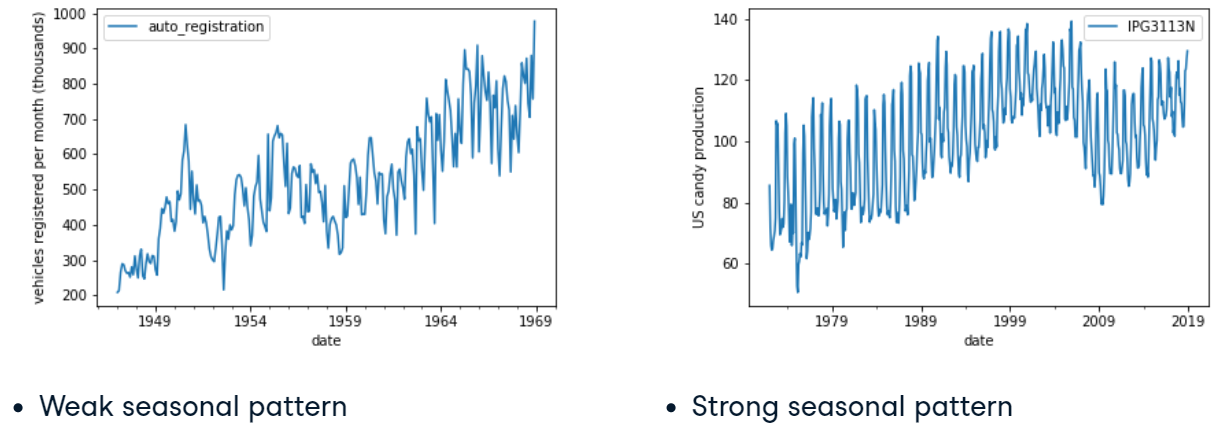

* Weak ไม่ต้องทำ seasonal difference ก็ได้
* Strong ทำ 1 seasonal difference

# **Additive vs Multiplicative Seasonality**

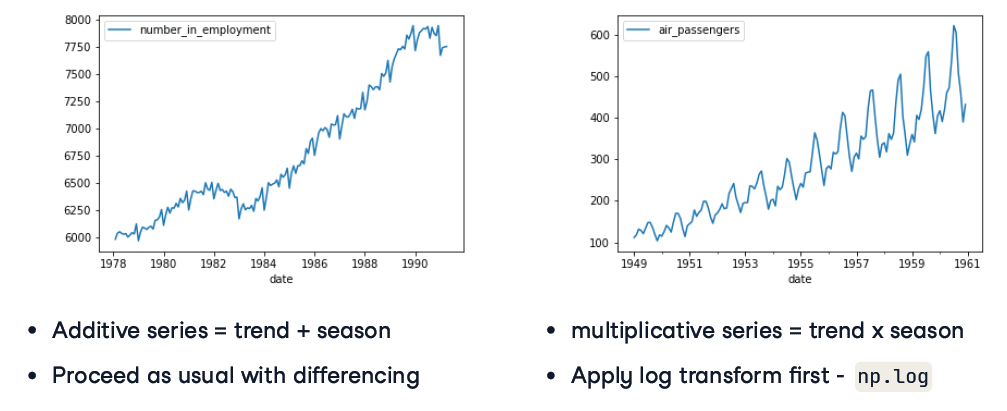

## ***SARIMA model diagnostics***

Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a **SARIMA(1, 1, 1)(0, 1, 1, 12)** model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the **`SARIMAX`** class and going through the normal model diagnostics procedure.

The DataFrame, `co2`, and the **`SARIMAX`** model class are available in your environment.

* Fit a SARIMA(1, 1, 1)(0, 1, 1, 12) model to the data and set the trend to constant.

In [4]:
co2 = pd.read_csv('co2.csv', index_col='date', parse_dates=True)

# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                trend='c')
# Fit model
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Wed, 07 Sep 2022   AIC                            369.437
Time:                                    13:47:24   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2413      0.078   

* Create the common diagnostics plots for the results object.

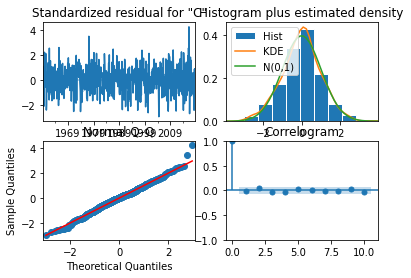

In [5]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

The residuals look fine.

## ***SARIMA forecast***

In the previous exercise you confirmed that a SARIMA $(1,1,1)$ x $(0,1,1)_{12}$ model was a good fit to the CO time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO emissions or we will face major societal challenges.

In this exercise, you will forecast the CO time series up to the year 2030 to find the CO levels if we continue emitting as usual.

The trained model results object is available in your environment as `results`.


* Create a forecast object for the next 136 steps - the number of months until Jan 2030.

* Assign the **`.predicted_mean`** of the forecast to the variable mean.
Compute the confidence intervals and assign this DataFrame to the variable **`conf_int`**.

In [6]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

* Plot the `mean` predictions against the `dates`.
* Shade the area between the values in the first two columns of DataFrame `conf_int` using dates as the x-axis values.

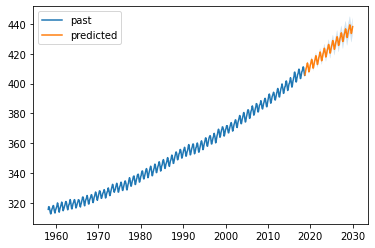

In [7]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int['lower CO2_ppm'], conf_int['upper CO2_ppm'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

* Print the final predicted `mean` of the forecast.
* Print the final row of the confidence interval `conf_int`.
Remember to select the correct elements by using `.iloc[____]` on both.

In [8]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.1940160929928
lower CO2_ppm    432.111992
upper CO2_ppm    444.276041
Name: 2030-01-01 00:00:00, dtype: float64


Your estimate says that CO2 will increase by roughly another 35ppm from October 2018 to January 2030. What do you think would happen if we lowered or raised our emission rates between now and then? How would our model perform if these dynamics changed?